In [15]:
import lib.World as W
import numpy as np
from stl import mesh

from time import process_time

FARAWAY = 1.0e+39

source = np.array((0, 0, -10))

w, h = (600, 480)
r = float(w) / h
# Screen coordinates: x0, y0, x1, y1.
S = (-1, 1 / r + .25, 1, -1 / r + .25)
x = np.tile(np.linspace(S[0], S[2], w), h)
y = np.repeat(np.linspace(S[1], S[3], h), w)

In [16]:
coords = np.stack((x, y, np.zeros(x.shape[0])), axis=0)
dirs = coords - source[:, np.newaxis]

m = mesh.Mesh.from_file('models/monke.stl')
direction = dirs

frame = W.Frame((0, 0, 0))
obj = W.MeshObject([0, 0, 0], frame, m, (0,))

t1s = process_time()
arr1 = obj.intersect(source, direction)
t1e = process_time()

t2s = process_time()
arr2 = obj.np_intersect(source, direction)
t2e = process_time()

print((arr2 == arr1).all())
print("time1: " + str(t1e-t1s))
print("time2: " + str(t2e-t2s))

np.max(np.abs(arr1-arr2))

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 968]
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
968
False
time1: 61.859375
time2: 67.734375


2.220446049250313e-16

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

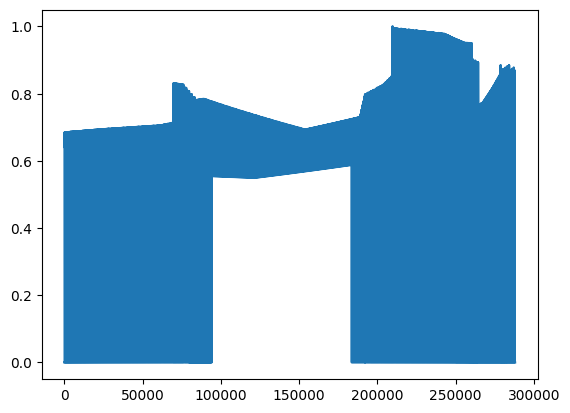

In [18]:
cleaned = np.where(arr1 < 200, arr1, 0)
arr_bw = cleaned/np.max(cleaned)
plt.plot(arr_bw)

In [19]:
arr_bw = (255 * arr_bw.reshape((h, w))).astype(np.uint8)

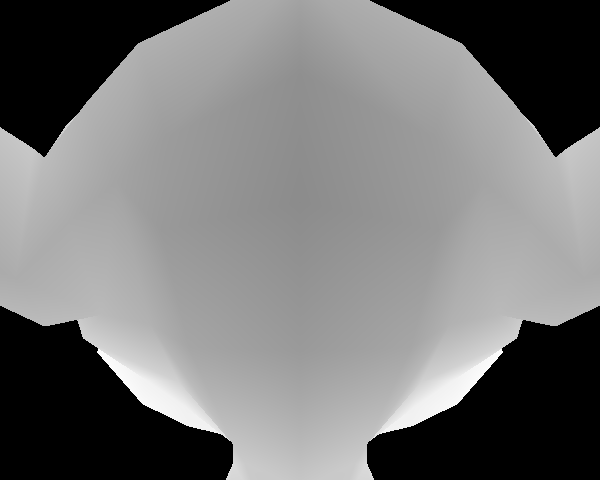

In [20]:
bw_image = Image.fromarray(arr_bw, "L")
display(bw_image)

In [21]:
np.min(np.extract(arr1 < 1000, arr1))

0.6740755092316494